In [20]:
import pandas as pd
import matplotlib as plt

In [21]:
df = pd.read_csv("data/actes-criminels.csv")

In [22]:
print(df.columns.values)

['CATEGORIE' 'DATE' 'QUART' 'PDQ' 'X' 'Y' 'LONGITUDE' 'LATITUDE']


In [23]:
df.tail()

,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE
247776,Méfait,2023-01-25,nuit,5.0,282322.244000,5.038093e+06,-73.787533,45.482397
247777,Vol de véhicule à moteur,2023-01-25,nuit,27.0,NaN,NaN,NaN,NaN
247778,Vol dans / sur véhicule à moteur,2023-01-25,nuit,7.0,287693.613000,5.040649e+06,-73.718913,45.505551
247779,Infractions entrainant la mort,2023-01-25,nuit,22.0,300219.661995,5.043573e+06,-73.558643,45.532059
247780,Vol dans / sur véhicule à moteur,2023-01-25,nuit,21.0,NaN,NaN,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247781 entries, 0 to 247780
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   CATEGORIE  247781 non-null  object 
 1   DATE       247781 non-null  object 
 2   QUART      247781 non-null  object 
 3   PDQ        247776 non-null  float64
 4   X          205753 non-null  float64
 5   Y          205753 non-null  float64
 6   LONGITUDE  205753 non-null  float64
 7   LATITUDE   205753 non-null  float64
dtypes: float64(5), object(3)
memory usage: 15.1+ MB


Most common to least common:
1. Theft from car (Vol dans / sur véhicule à moteur)
2. Breaking and entering (Introduction)
3. Mischief (Méfait)
4. Theft of car (Vol de véhicule à moteur)
5. Robbery (Vols qualifiés)
6. Murder (Infractions entrainant la mort)

In [25]:
df.groupby(['PDQ']).count().sort_values('CATEGORIE')

,CATEGORIE,DATE,QUART,X,Y,LONGITUDE,LATITUDE
PDQ,,,,,,,
55.0,92,92,92,92,92,92,92
50.0,2028,2028,2028,2028,2028,2028,2028
24.0,2532,2532,2532,1262,1262,1262,1262
1.0,2850,2850,2850,2648,2648,2648,2648
33.0,2952,2952,2952,2473,2473,2473,2473
4.0,3163,3163,3163,2963,2963,2963,2963
11.0,3890,3890,3890,3353,3353,3353,3353
3.0,4527,4527,4527,4224,4224,4224,4224
9.0,4529,4529,4529,4117,4117,4117,4117


In [26]:
df[df['CATEGORIE']=='Infractions entrainant la mort'].groupby(['PDQ']).count().sort_values('CATEGORIE')

,CATEGORIE,DATE,QUART,X,Y,LONGITUDE,LATITUDE
PDQ,,,,,,,
33.0,2,2,2,2,2,2,2
5.0,3,3,3,3,3,3,3
10.0,4,4,4,3,3,3,3
11.0,4,4,4,4,4,4,4
35.0,4,4,4,2,2,2,2
31.0,5,5,5,3,3,3,3
44.0,5,5,5,5,5,5,5
7.0,6,6,6,5,5,5,5
16.0,6,6,6,3,3,3,3


<Axes: title={'center': 'Overall Crime Trends'}, xlabel='Year', ylabel='Total Number of Crimes'>

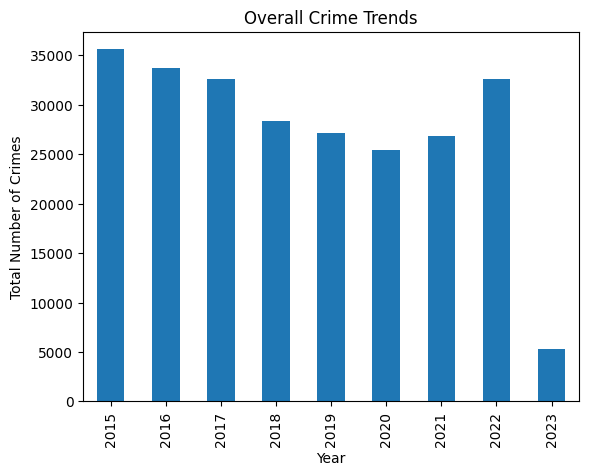

In [35]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['PERIOD'] = df['DATE'].apply(lambda x: 'Pre-Pandemic' if x.year < 2020 else 'Pandemic')
grouped_df = df.groupby([df['DATE'].dt.year, 'CATEGORIE', 'PERIOD']).size().reset_index(name='COUNT')

# Plot overall crime trends using pandas
overall_crime_trends = grouped_df.groupby('DATE')['COUNT'].sum()
overall_crime_trends.plot(kind='bar', xlabel='Year', ylabel='Total Number of Crimes', title='Overall Crime Trends')
